In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler;
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import joblib
import streamlit as st

# **Etapa 1 CRISP- DM: Entendimento do negócio**

No contexto de previsão de renda, o objetivo principal geralmente é identificar padrões nos dados que possam prever a faixa de renda de um indivíduo. Isso pode ser útil em diversos setores, como:

**Bancos e Finanças**: Avaliação de crédito e segmentação de clientes.

**Marketing**: Personalização de ofertas baseadas no potencial de renda.

**Políticas Públicas**: Estudo de desigualdades sociais.

Para refinar nossa abordagem, precisamos considerar as seguintes perguntas:

**O problema principal**: Queremos prever a renda com base em variáveis como idade, educação, profissão, etc.

**Métricas de sucesso**: Por exemplo, a precisão do modelo ou a capacidade de separar as faixas de renda corretamente.

**Stakeholders**: Quem irá usar os resultados? Bancos? Analistas de dados? Governos?

# **Etapa 2 CRISP- DM: Entendimento dos dados**

In [2]:
file_path = 'previsao_de_renda.csv'
dados = pd.read_csv(file_path)

In [3]:
dados_info = {
    "shape": dados.shape,
    "columns": dados.columns.tolist(),
    "missing_values": dados.isnull().sum().to_dict(),
    "data_types": dados.dtypes.to_dict()
}

In [5]:
dados_head = dados.head()
dados_info

{'shape': (15000, 15),
 'columns': ['Unnamed: 0',
  'data_ref',
  'id_cliente',
  'sexo',
  'posse_de_veiculo',
  'posse_de_imovel',
  'qtd_filhos',
  'tipo_renda',
  'educacao',
  'estado_civil',
  'tipo_residencia',
  'idade',
  'tempo_emprego',
  'qt_pessoas_residencia',
  'renda'],
 'missing_values': {'Unnamed: 0': 0,
  'data_ref': 0,
  'id_cliente': 0,
  'sexo': 0,
  'posse_de_veiculo': 0,
  'posse_de_imovel': 0,
  'qtd_filhos': 0,
  'tipo_renda': 0,
  'educacao': 0,
  'estado_civil': 0,
  'tipo_residencia': 0,
  'idade': 0,
  'tempo_emprego': 2573,
  'qt_pessoas_residencia': 0,
  'renda': 0},
 'data_types': {'Unnamed: 0': dtype('int64'),
  'data_ref': dtype('O'),
  'id_cliente': dtype('int64'),
  'sexo': dtype('O'),
  'posse_de_veiculo': dtype('bool'),
  'posse_de_imovel': dtype('bool'),
  'qtd_filhos': dtype('int64'),
  'tipo_renda': dtype('O'),
  'educacao': dtype('O'),
  'estado_civil': dtype('O'),
  'tipo_residencia': dtype('O'),
  'idade': dtype('int64'),
  'tempo_emprego': 

In [6]:
dados_head

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


## Dicionário de dados:

| Variável                 | Descrição                                      | Tipo          |
|--------------------------|------------------------------------------------|---------------|
| Unnamed: 0              | Índice adicional ou identificador              | Numérica      |
| data_ref                | Data de referência                             | Categórica    |
| id_cliente              | Identificador único do cliente                 | Numérica      |
| sexo                    | Gênero do cliente                              | Categórica    |
| posse_de_veiculo        | Indica se o cliente possui veículo             | Categórica    |
| posse_de_imovel         | Indica se o cliente possui imóvel              | Categórica    |
| qtd_filhos              | Quantidade de filhos do cliente                | Numérica      |
| tipo_renda              | Tipo de fonte de renda do cliente              | Categórica    |
| educacao                | Nível de escolaridade do cliente               | Categórica    |
| estado_civil            | Estado civil do cliente                        | Categórica    |
| tipo_residencia         | Tipo de residência do cliente                  | Categórica    |
| idade                   | Idade do cliente                               | Numérica      |
| tempo_emprego           | Tempo de emprego em anos (pode ter valores nulos) | Numérica    |
| qt_pessoas_residencia   | Quantidade de pessoas que moram na mesma residência | Numérica  |
| renda                   | Renda mensal do cliente                        | Numérica      |

## Carregando os dados

In [11]:
dados.shape, dados.columns

((15000, 14),
 Index(['data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
        'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
        'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
        'renda'],
       dtype='object'))

## Entendimento dos dados - Univariada:
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis

In [14]:
def explorar_distribuicoes(dados):
    # Variáveis numéricas
    variaveis_numericas = dados.select_dtypes(include=['int64', 'float64']).columns
    for coluna in variaveis_numericas:
        plt.figure(figsize=(8, 5))
        plt.hist(dados[coluna].dropna(), bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Distribuição da Variável: {coluna}')
        plt.xlabel(coluna)
        plt.ylabel('Frequência')
        plt.show()

    # Variáveis categóricas
    variaveis_categoricas = dados.select_dtypes(include=['object', 'bool']).columns
    for coluna in variaveis_categoricas:
        plt.figure(figsize=(8, 5))
        dados[coluna].value_counts().plot(kind='bar', alpha=0.7)
        plt.title(f'Distribuição da Variável: {coluna}')
        plt.xlabel(coluna)
        plt.ylabel('Frequência')
        plt.show()

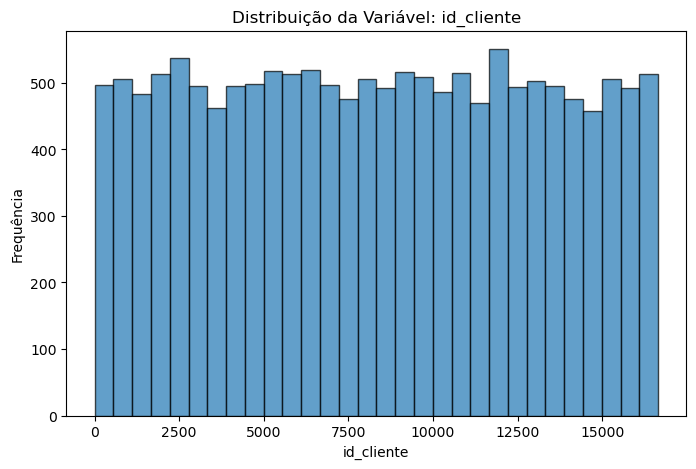

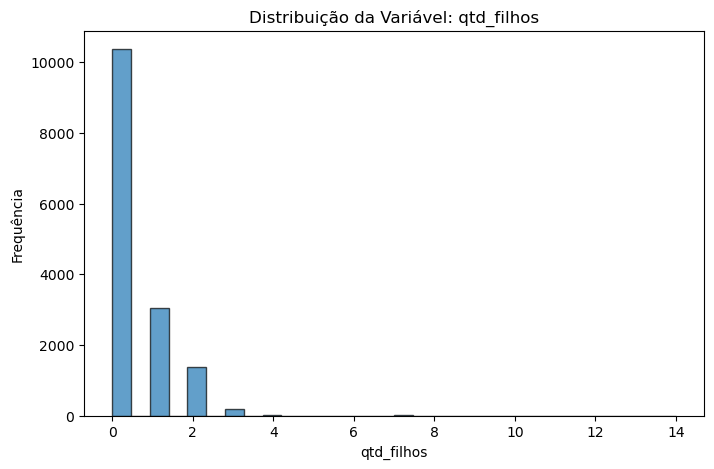

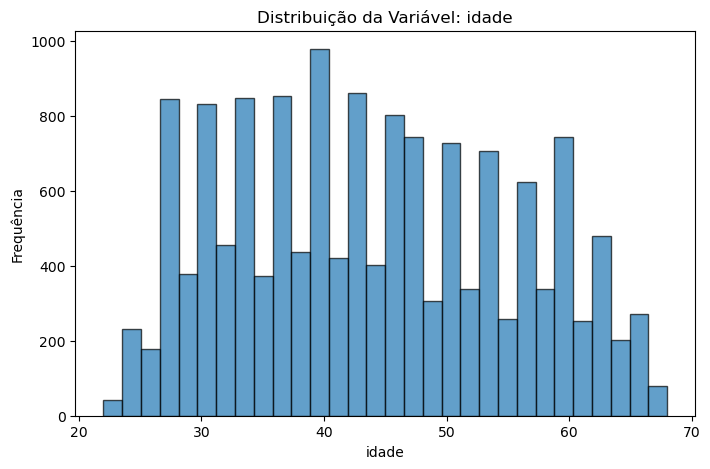

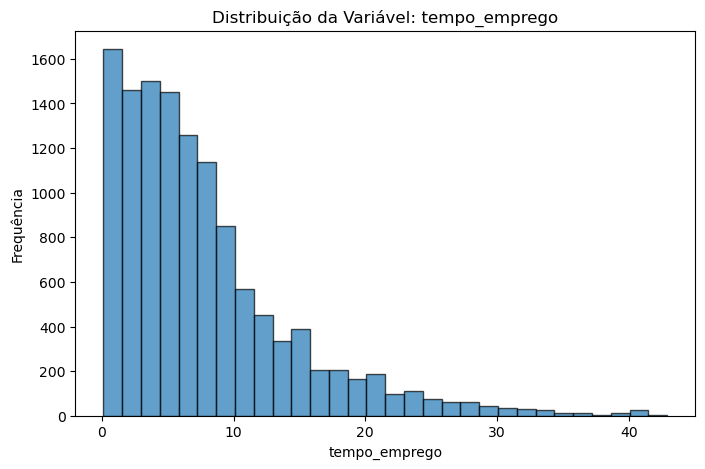

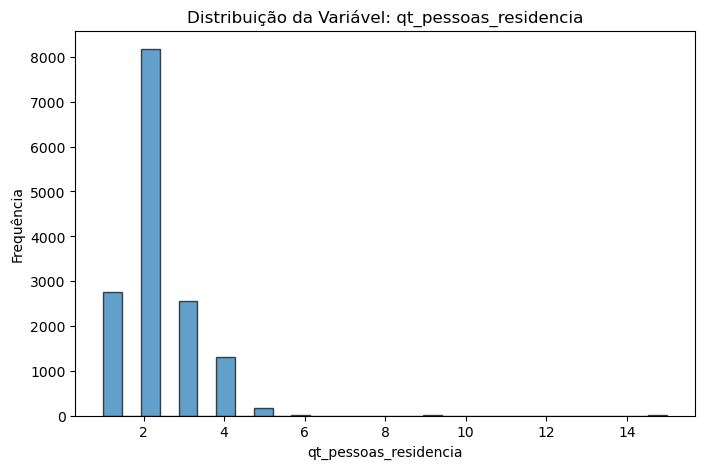

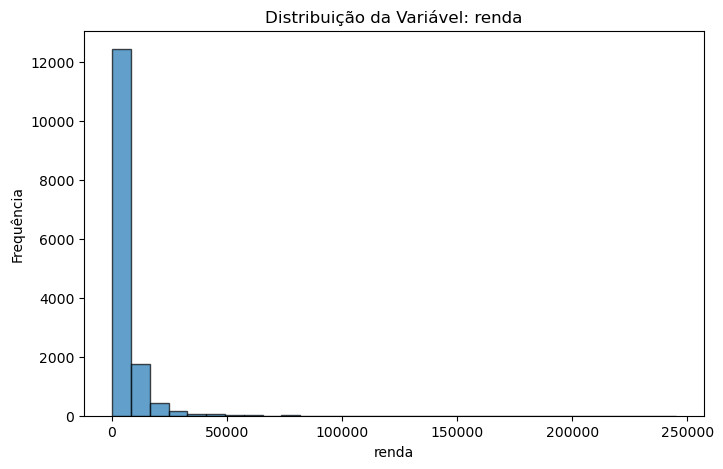

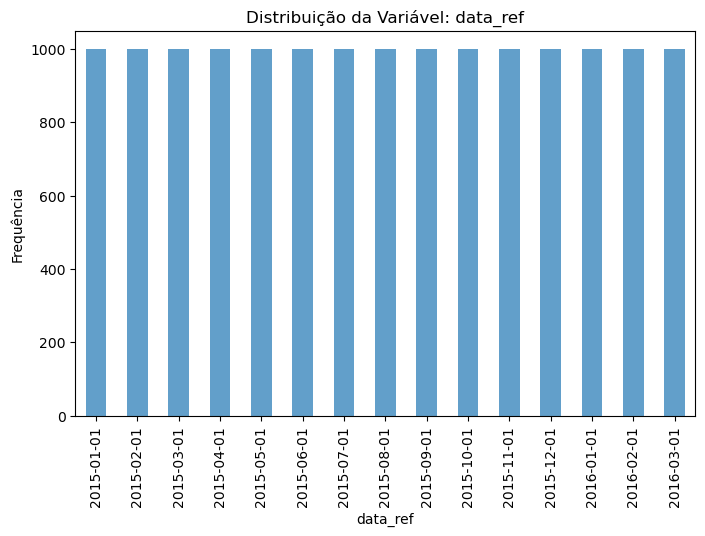

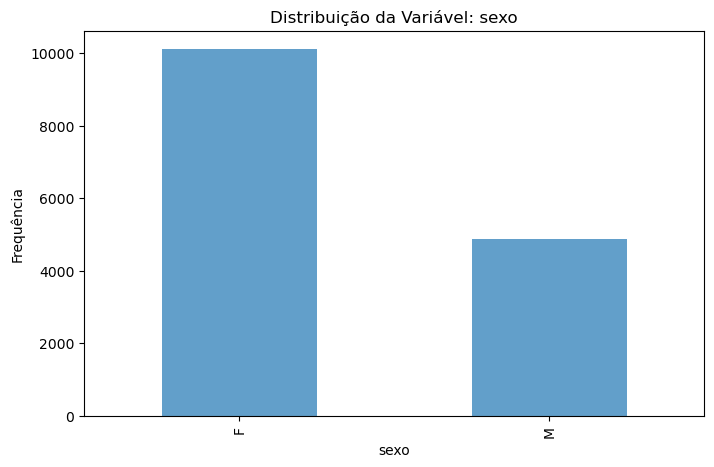

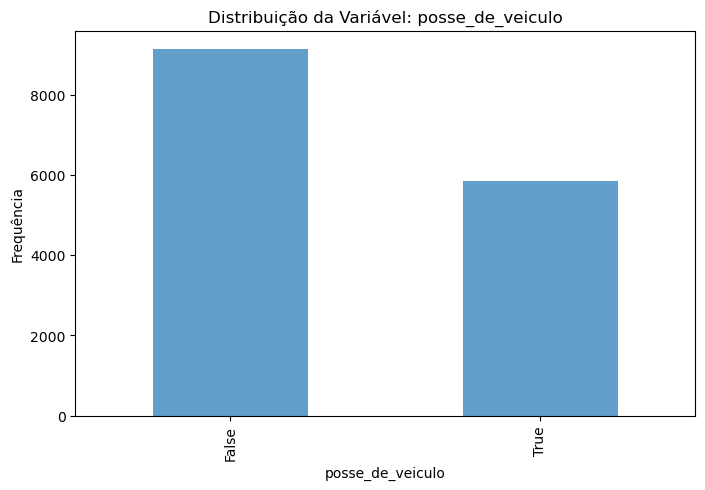

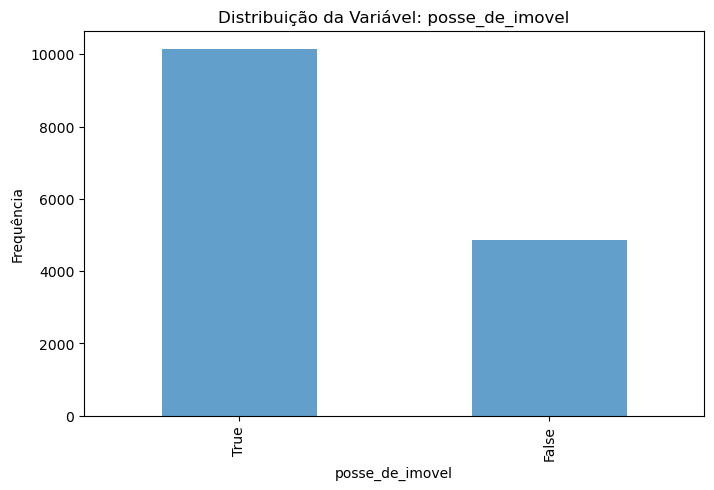

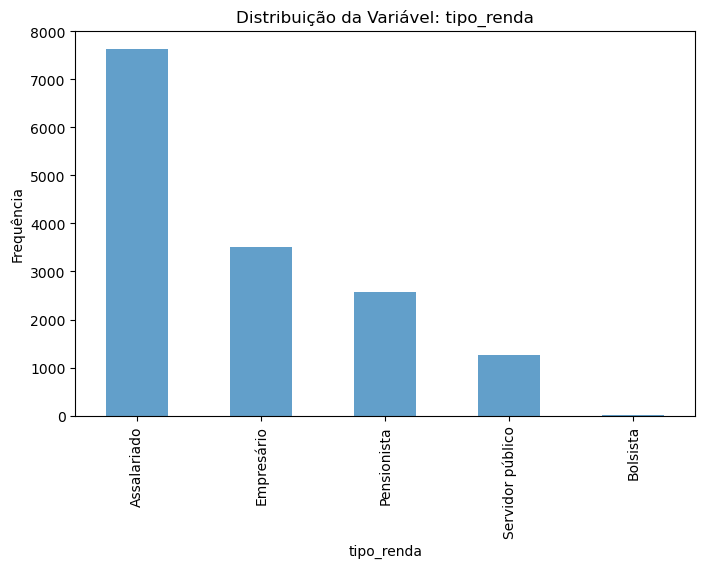

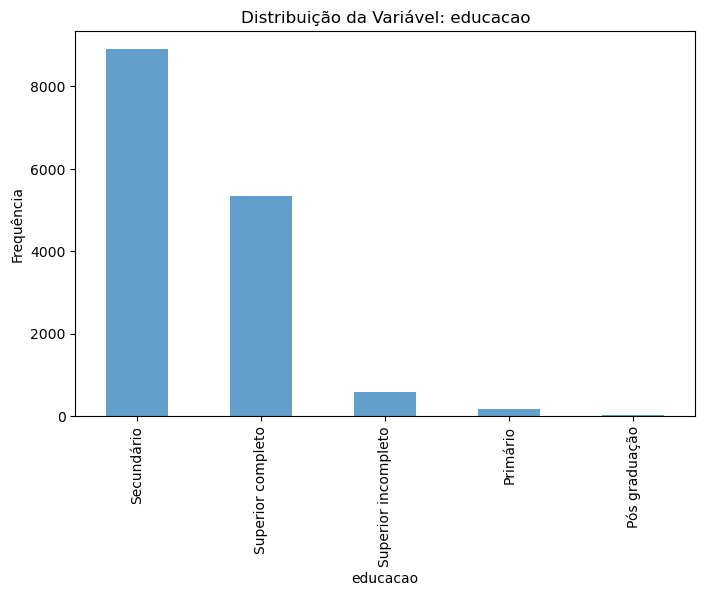

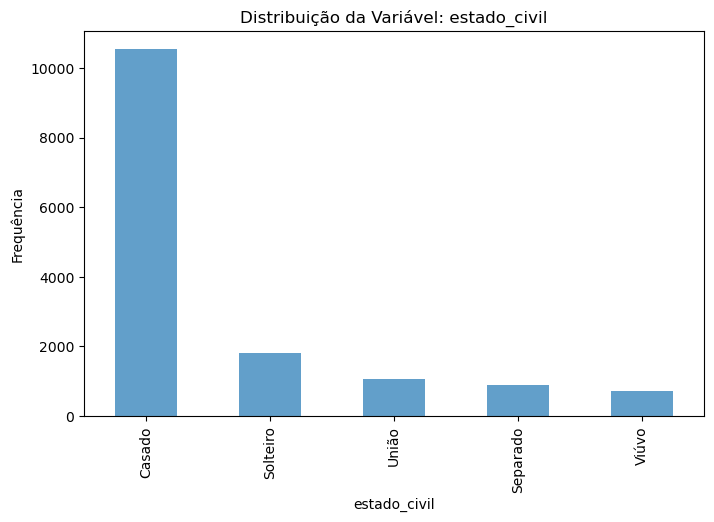

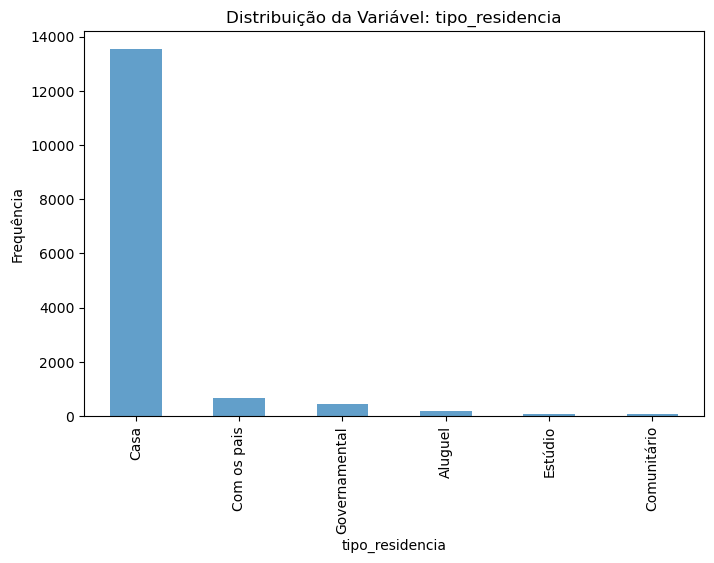

In [15]:
explorar_distribuicoes(dados)

# Função para explorar relações bivariadas
def explorar_bivariadas(dados, target):
    # Relações numéricas com a variável alvo
    variaveis_numericas = dados.select_dtypes(include=['int64', 'float64']).columns
    for coluna in variaveis_numericas:
        if coluna != target:
            plt.figure(figsize=(8, 5))
            sns.scatterplot(x=dados[coluna], y=dados[target], alpha=0.5)
            plt.title(f'Relação entre {coluna} e {target}')
            plt.xlabel(coluna)
            plt.ylabel(target)
            plt.show()
    
    # Relações categóricas com a variável alvo
    variaveis_categoricas = dados.select_dtypes(include=['object', 'bool']).columns
    for coluna in variaveis_categoricas:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=dados[coluna], y=dados[target])
        plt.title(f'Relação entre {coluna} e {target}')
        plt.xlabel(coluna)
        plt.ylabel(target)
        plt.xticks(rotation=45)
        plt.show()

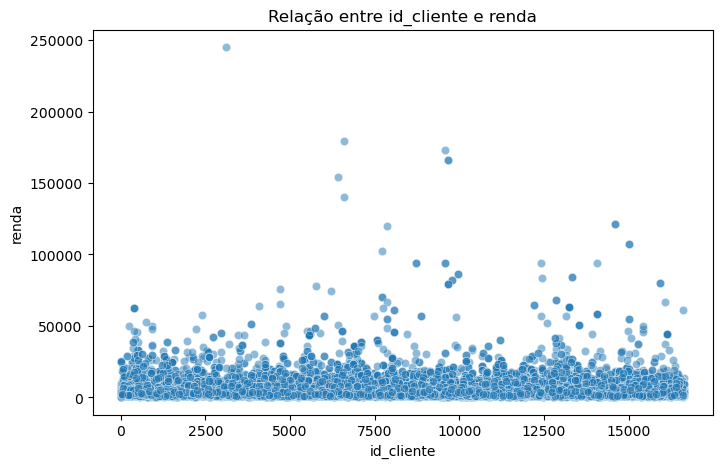

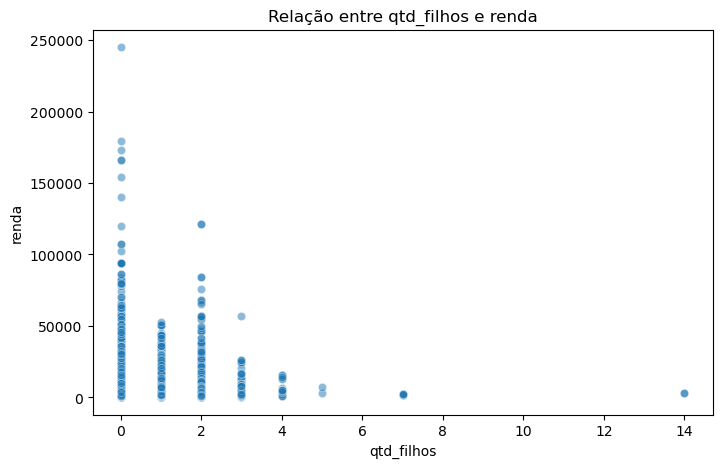

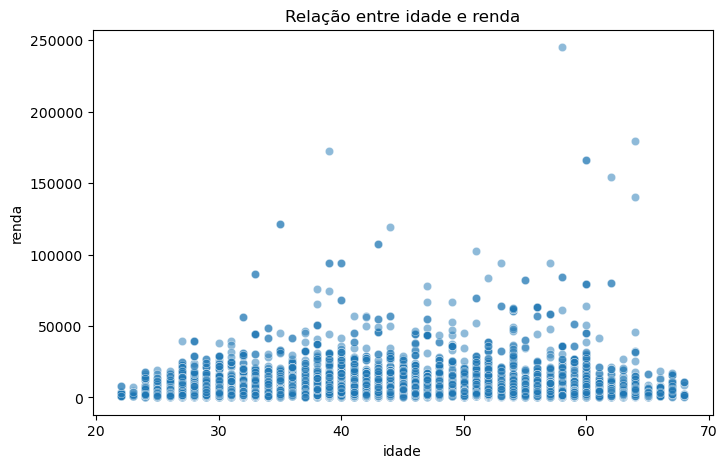

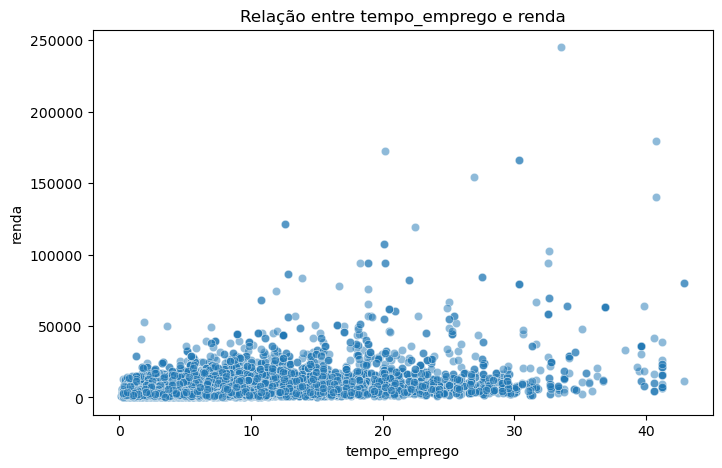

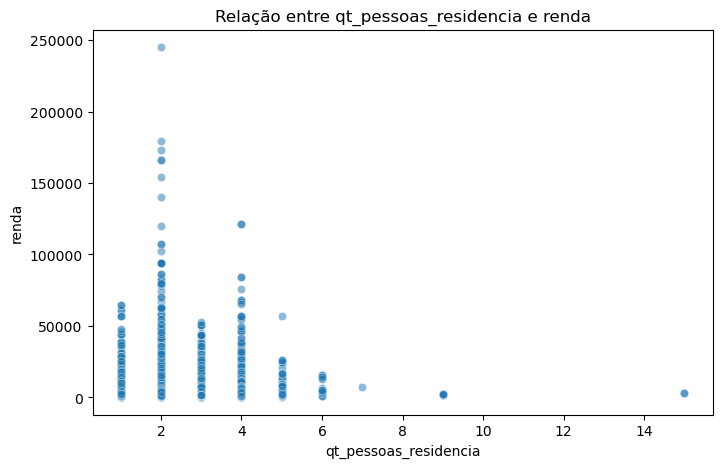

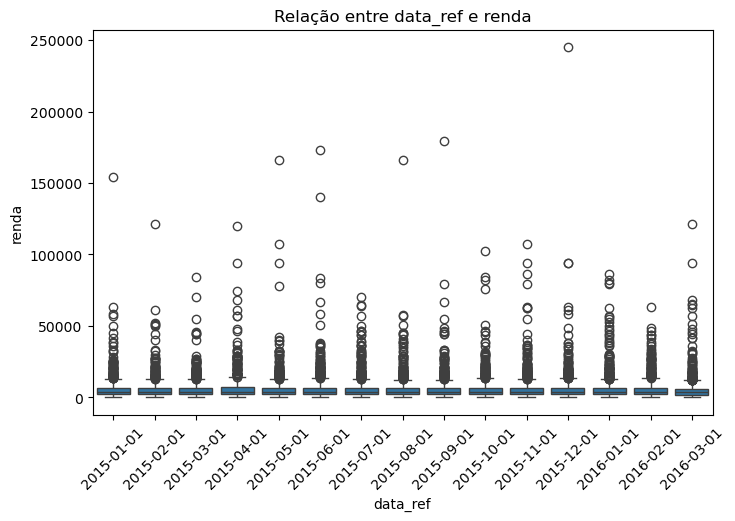

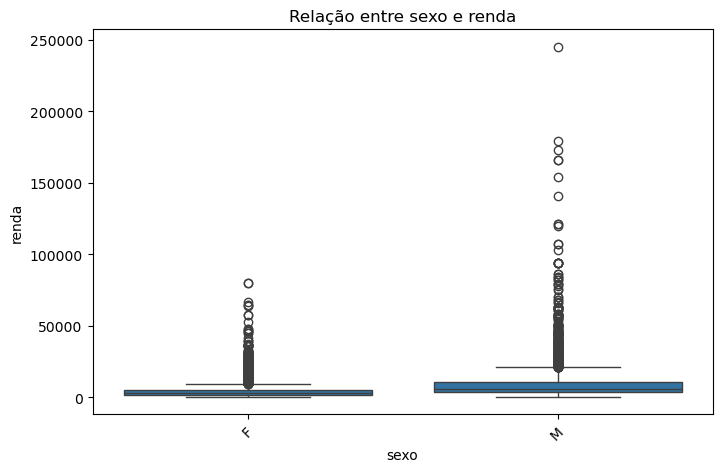

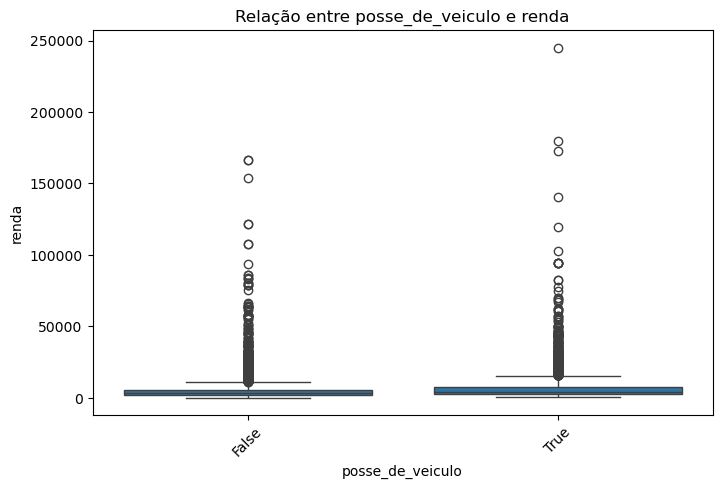

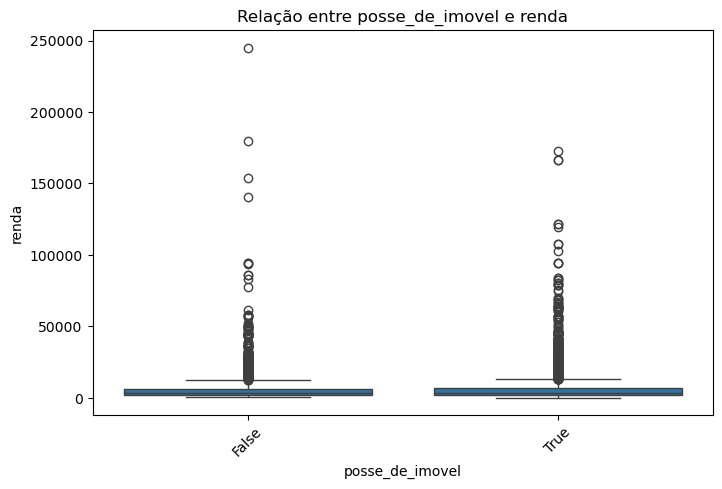

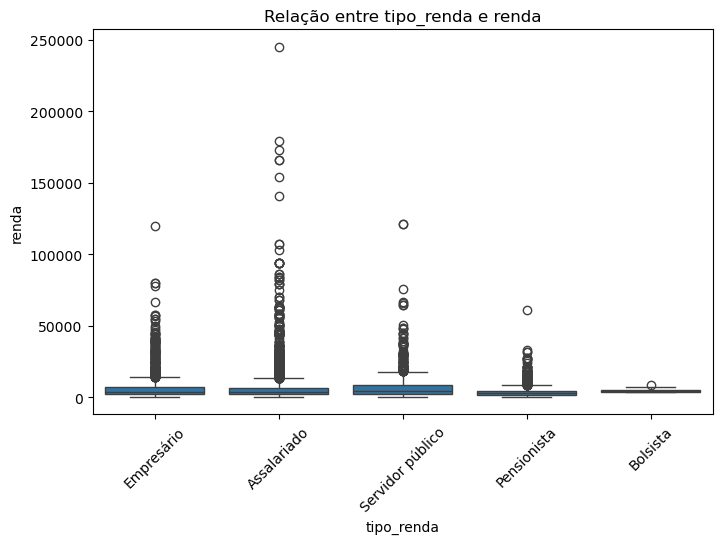

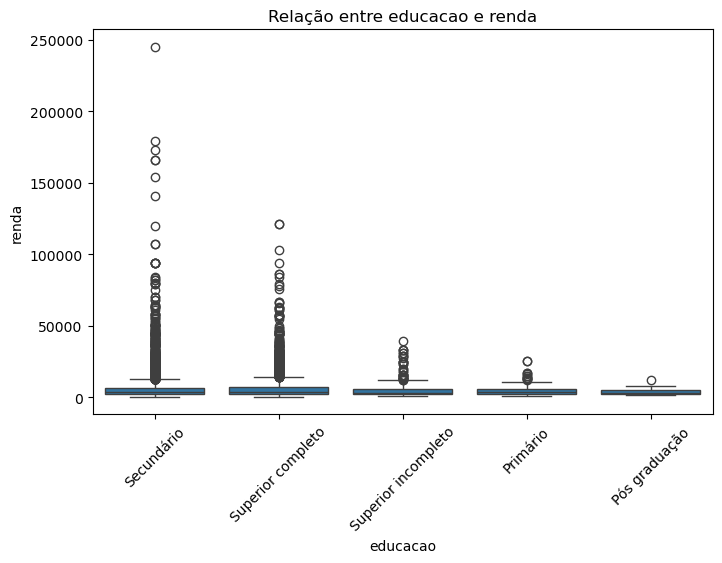

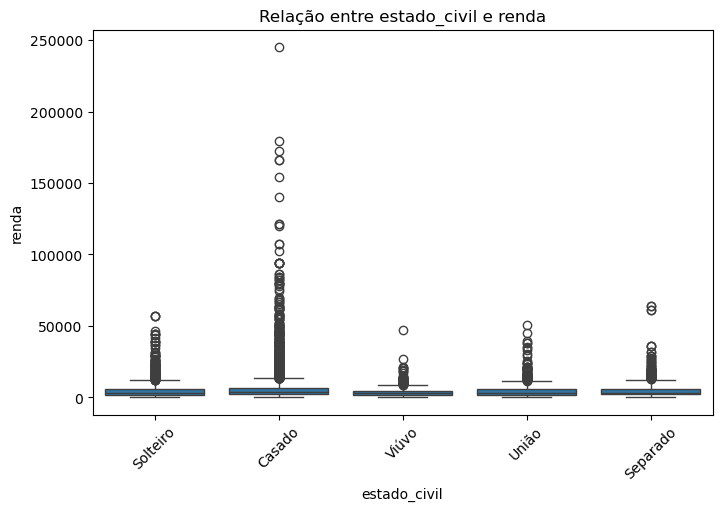

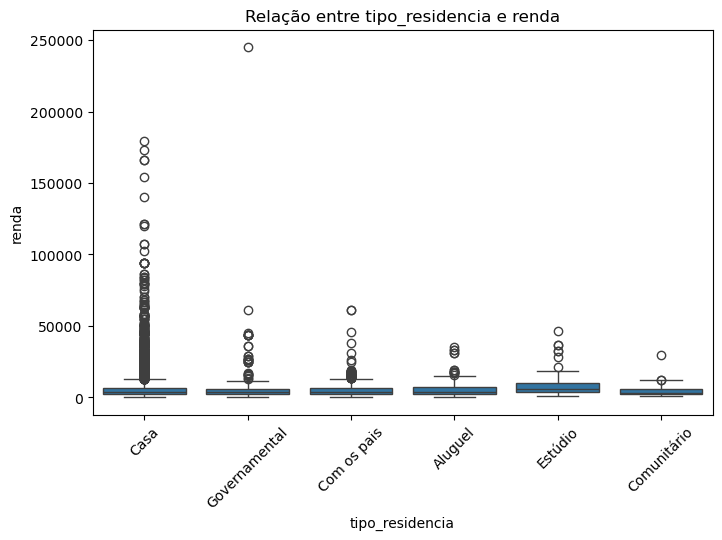

In [24]:
# Variável alvo: renda
explorar_bivariadas(dados, 'renda')

# Etapa 3 Crisp-DM: Preparação dos dados

Nessa etapa realizamos tipicamente as seguintes operações com os dados:

**seleção**: Já temos os dados selecionados adequadamente?

**limpeza**: Precisaremos identificar e tratar dados faltantes

**construção**: construção de novas variáveis

**integração**: Temos apenas uma fonte de dados, não é necessário integração

**formatação**: Os dados já se encontram em formatos úteis?

In [26]:
# Removendo a coluna 'data_ref'
dados = dados.drop(columns=['data_ref'])

# Exibindo as colunas restantes para confirmar a remoção
dados.columns

Index(['id_cliente', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')

In [33]:
# Calculando a mediana da coluna 'tempo_emprego'
mediana_tempo_emprego = dados['tempo_emprego'].median()
mediana_tempo_emprego

6.013698630136986

In [32]:
# Preenchendo os valores ausentes com a mediana
dados['tempo_emprego'] = dados['tempo_emprego'].fillna(mediana_tempo_emprego)
dados

,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,6.013699,1.0,10093.45
14997,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [31]:
# Verificando se ainda há valores nulos
valores_nulos_restantes = dados['tempo_emprego'].isnull().sum()
valores_nulos_restantes

0

In [39]:
# Função para identificar outliers com base no IQR
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

In [38]:
# Identificando outliers para as variáveis numéricas
variaveis_numericas = dados.select_dtypes(include=['int64', 'float64']).columns
outliers_info = {}

for coluna in variaveis_numericas:
    outliers, limite_inferior, limite_superior = detectar_outliers(dados, coluna)
    outliers_info[coluna] = {
        "total_outliers": len(outliers),
        "limite_inferior": limite_inferior,
        "limite_superior": limite_superior
    }

# Exibindo os limites e o número de outliers para cada variável
pd.DataFrame(outliers_info).T

,total_outliers,limite_inferior,limite_superior
id_cliente,0.0,-8152.000000,24736.00000
qtd_filhos,211.0,-1.500000,2.50000
idade,0.0,5.500000,81.50000
tempo_emprego,1198.0,-4.435616,17.00000
qt_pessoas_residencia,205.0,0.500000,4.50000
renda,1221.0,-4522.976250,12941.25375


In [40]:
# Removendo os outliers com base nos limites calculados
for coluna in outliers_info.keys():
    limite_inferior = outliers_info[coluna]['limite_inferior']
    limite_superior = outliers_info[coluna]['limite_superior']
    dados = dados[(dados[coluna] >= limite_inferior) & (dados[coluna] <= limite_superior)]

# Verificando a nova dimensão do dataset após a remoção de outliers
dados.shape

(12787, 13)

In [41]:
# Criando faixas etárias
bins = [0, 18, 35, 60, 100]
labels = ['Jovem', 'Adulto', 'Meia-idade', 'Idoso']
dados['faixa_etaria'] = pd.cut(dados['idade'], bins=bins, labels=labels, include_lowest=True)

# Exibindo a contagem de cada faixa etária para validação
faixa_etaria_counts = dados['faixa_etaria'].value_counts()
faixa_etaria_counts

faixa_etaria
Meia-idade    7716
Adulto        3844
Idoso         1227
Jovem            0
Name: count, dtype: int64

In [42]:
# Criando categorias para 'tempo_emprego'
bins_emprego = [-1, 0, 5, 10, 20]
labels_emprego = ['Desempregado', 'Até 5 anos', '5 a 10 anos', 'Mais de 10 anos']
dados['tempo_emprego_categoria'] = pd.cut(
    dados['tempo_emprego'], bins=bins_emprego, labels=labels_emprego, include_lowest=True
)

# Exibindo a contagem de cada categoria de tempo de emprego para validação
tempo_emprego_counts = dados['tempo_emprego_categoria'].value_counts()
tempo_emprego_counts

tempo_emprego_categoria
5 a 10 anos        6068
Até 5 anos         5105
Mais de 10 anos    1614
Desempregado          0
Name: count, dtype: int64

In [43]:
# Criando uma nova variável: proporção de filhos por residência
dados['proporcao_filhos_residencia'] = dados['qtd_filhos'] / dados['qt_pessoas_residencia']

# Substituindo possíveis divisões por zero por 0
dados['proporcao_filhos_residencia'] = dados['proporcao_filhos_residencia'].fillna(0)

# Exibindo estatísticas descritivas da nova variável
proporcao_stats = dados['proporcao_filhos_residencia'].describe()
proporcao_stats

count    12787.000000
mean         0.121882
std          0.194297
min          0.000000
25%          0.000000
50%          0.000000
75%          0.333333
max          2.000000
Name: proporcao_filhos_residencia, dtype: float64

In [44]:
# Aplicando One-Hot Encoding às variáveis categóricas
variaveis_categoricas = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'faixa_etaria', 'tempo_emprego_categoria']
dados_encoded = pd.get_dummies(dados, columns=variaveis_categoricas, drop_first=True)

# Exibindo as novas colunas criadas após o encoding
novas_colunas = set(dados_encoded.columns) - set(dados.columns)
novas_colunas

{'educacao_Pós graduação',
 'educacao_Secundário',
 'educacao_Superior completo',
 'educacao_Superior incompleto',
 'estado_civil_Separado',
 'estado_civil_Solteiro',
 'estado_civil_União',
 'estado_civil_Viúvo',
 'faixa_etaria_Adulto',
 'faixa_etaria_Idoso',
 'faixa_etaria_Meia-idade',
 'sexo_M',
 'tempo_emprego_categoria_5 a 10 anos',
 'tempo_emprego_categoria_Até 5 anos',
 'tempo_emprego_categoria_Mais de 10 anos',
 'tipo_renda_Bolsista',
 'tipo_renda_Empresário',
 'tipo_renda_Pensionista',
 'tipo_renda_Servidor público',
 'tipo_residencia_Casa',
 'tipo_residencia_Com os pais',
 'tipo_residencia_Comunitário',
 'tipo_residencia_Estúdio',
 'tipo_residencia_Governamental'}

In [45]:
dados_encoded

,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,proporcao_filhos_residencia,sexo_M,...,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,faixa_etaria_Adulto,faixa_etaria_Meia-idade,faixa_etaria_Idoso,tempo_emprego_categoria_Até 5 anos,tempo_emprego_categoria_5 a 10 anos,tempo_emprego_categoria_Mais de 10 anos
0,15056,False,True,0,26,6.602740,1.0,8060.34,0.000000,False,...,False,False,False,False,True,False,False,False,True,False
1,9968,True,True,0,28,7.183562,2.0,1852.15,0.000000,True,...,False,False,False,False,True,False,False,False,True,False
2,4312,True,True,0,35,0.838356,2.0,2253.89,0.000000,False,...,False,False,False,False,True,False,False,True,False,False
3,10639,False,True,1,30,4.846575,3.0,6600.77,0.333333,False,...,False,False,False,False,True,False,False,True,False,False
4,7064,True,False,0,33,4.293151,1.0,6475.97,0.000000,True,...,False,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,16006,False,True,0,48,13.887671,1.0,7990.58,0.000000,False,...,False,False,False,False,False,True,False,False,False,True
14996,3722,False,True,0,57,6.013699,1.0,10093.45,0.000000,False,...,False,False,False,False,False,True,False,False,True,False
14997,6194,True,True,0,45,7.832877,2.0,604.82,0.000000,False,...,False,False,False,False,False,True,False,False,True,False
14998,4922,True,False,0,36,4.298630,2.0,3352.27,0.000000,True,...,False,False,False,False,False,True,False,True,False,False


In [48]:
# Selecionando variáveis numéricas para escalonamento
variaveis_numericas = ['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'proporcao_filhos_residencia']

# Aplicando o escalonador
scaler = StandardScaler()
dados_encoded[variaveis_numericas] = scaler.fit_transform(dados_encoded[variaveis_numericas])

# Exibindo estatísticas descritivas das variáveis escalonadas para validação
dados_escalonados_stats = dados_encoded[variaveis_numericas].describe()
dados_escalonados_stats

,idade,tempo_emprego,qt_pessoas_residencia,renda,proporcao_filhos_residencia
count,1.278700e+04,1.278700e+04,1.278700e+04,1.278700e+04,1.278700e+04
mean,8.612976e-18,-2.333839e-17,-8.863030e-17,5.779029e-17,-6.223570e-17
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.868374e+00,-1.587656e+00,-1.408227e+00,-1.393108e+00,-6.273212e-01
25%,-8.369340e-01,-7.382576e-01,-1.932618e-01,-7.481696e-01,-6.273212e-01
50%,-6.335419e-02,4.732209e-02,-1.932618e-01,-2.903309e-01,-6.273212e-01
75%,8.821323e-01,4.461899e-01,1.021703e+00,4.840361e-01,1.088336e+00
max,2.085479e+00,3.090114e+00,2.236668e+00,3.362526e+00,9.666623e+00


# Etapa 4 Crisp-DM: Modelagem

Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:

Selecionar a técnica de modelagem

Desenho do teste

Avaliação do modelo

In [51]:
# Separando as variáveis independentes (X) e dependente (y)
X = dados_encoded.drop(columns=['renda'])
y = dados_encoded['renda']

In [52]:
# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelo de Regressão Linear

In [54]:
# Inicializando o modelo de Regressão Linear
modelo_linear = LinearRegression()
modelo_linear

LinearRegression()

In [55]:
# Treinando o modelo
modelo_linear.fit(X_train, y_train)

LinearRegression()

In [58]:
# Fazendo previsões
y_pred = modelo_linear.predict(X_test)

In [59]:
# Calculando as métricas de avaliação
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [61]:
# Resultados das métricas
resultado_modelo_linear = {
    "RMSE": rmse,
    "MAE": mae,
    "R²": r2
}

resultado_modelo_linear

{'RMSE': 0.9043881234045172,
 'MAE': 0.7002186032811901,
 'R²': 0.22168086923415542}

**RMSE (Root Mean Squared Error)**: 0.904

-->Indica o erro médio da previsão em relação aos valores reais, em termos de unidade padronizada.

**MAE (Mean Absolute Error)**: 0.700

-->Erro absoluto médio, mais interpretável e menos influenciado por outliers.

**R² (Coeficiente de Determinação):** 0.222

-->Apenas 22.2% da variabilidade dos dados é explicada pelo modelo.

O R² é relativamente baixo, indicando que a regressão linear simples pode não capturar bem a complexidade do problema

## Modelo Random Forest 

In [65]:
# Inicializando o modelo de Random Forest
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf

RandomForestRegressor(random_state=42)

In [67]:
# Treinando o modelo
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
# Fazendo previsões
y_pred_rf = modelo_rf.predict(X_test)

In [69]:
# Calculando as métricas de avaliação
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Resultados das métricas
resultado_modelo_rf = {
    "RMSE": rmse_rf,
    "MAE": mae_rf,
    "R²": r2_rf
}

resultado_modelo_rf

{'RMSE': 0.7920315775549934,
 'MAE': 0.5224378572223185,
 'R²': 0.40305681545626937}

**RMSE (Root Mean Squared Error)**: 0.792

--> Melhor que o modelo de regressão linear, indicando previsões mais precisas.

**MAE (Mean Absolute Error)**: 0.522

--> Erro médio absoluto significativamente menor.

**R² (Coeficiente de Determinação)**: 0.403

--> O modelo explica 40.3% da variabilidade nos dados, um aumento considerável em relação à regressão linear.

## Modelo Gradient Boosting

In [72]:
# Inicializando o modelo de Gradient Boosting
modelo_gb = GradientBoostingRegressor(random_state=42)
modelo_gb

GradientBoostingRegressor(random_state=42)

In [73]:
# Treinando o modelo
modelo_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [74]:
# Fazendo previsões
y_pred_gb = modelo_gb.predict(X_test)

In [75]:
# Calculando as métricas de avaliação
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Resultados das métricas
resultado_modelo_gb = {
    "RMSE": rmse_gb,
    "MAE": mae_gb,
    "R²": r2_gb
}

resultado_modelo_gb

{'RMSE': 0.8857146997320275,
 'MAE': 0.6791720069290497,
 'R²': 0.2534898631250444}

**RMSE (Root Mean Squared Error)**: 0.886

--> Melhor que a regressão linear, mas não tão bom quanto o Random Forest.

**MAE (Mean Absolute Error)**: 0.679

--> Resultado intermediário entre a Regressão Linear e o Random Forest.

**R² (Coeficiente de Determinação)**: 0.253

-->Explica 25.3% da variabilidade nos dados, ficando acima da Regressão Linear, mas abaixo do Random Forest.

## Desenho do teste

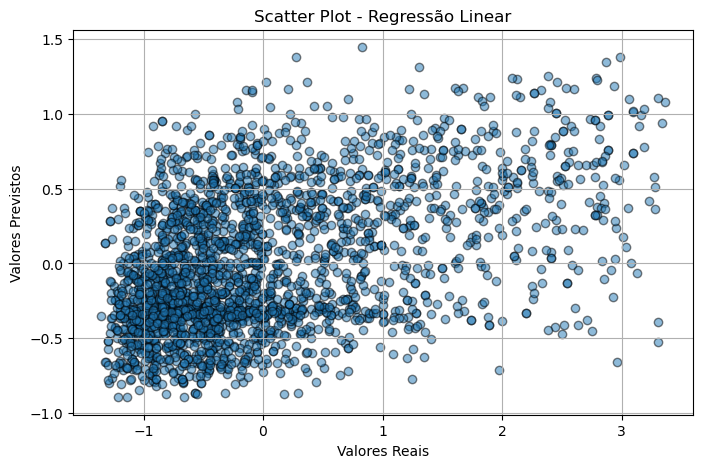

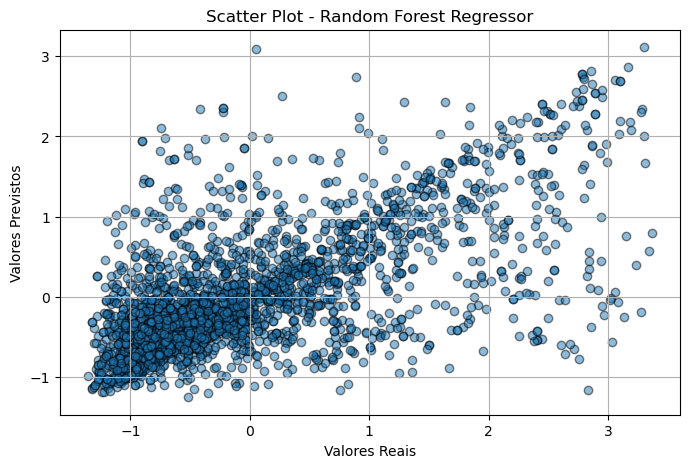

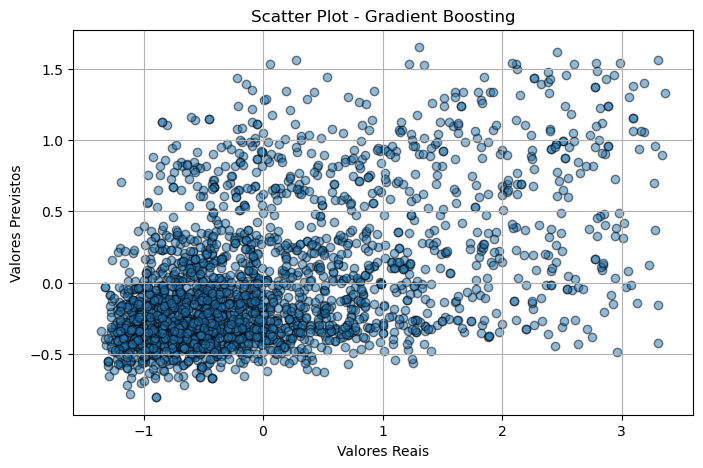

In [76]:
# Função para criar scatter plots
def scatter_plot_model(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
    plt.title(f'Scatter Plot - {model_name}')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')
    plt.grid(True)
    plt.show()

# Gerando scatter plots para cada modelo
scatter_plot_model(y_test, y_pred, "Regressão Linear")
scatter_plot_model(y_test, y_pred_rf, "Random Forest Regressor")
scatter_plot_model(y_test, y_pred_gb, "Gradient Boosting")

**Regressão Linear**: A dispersão é maior, indicando menor capacidade de captura de padrões.

**Random Forest Regressor**: Os valores previstos estão mais próximos dos reais, mostrando melhor desempenho.

**Gradient Boosting**: Desempenho intermediário, com maior dispersão em relação ao Random Forest.

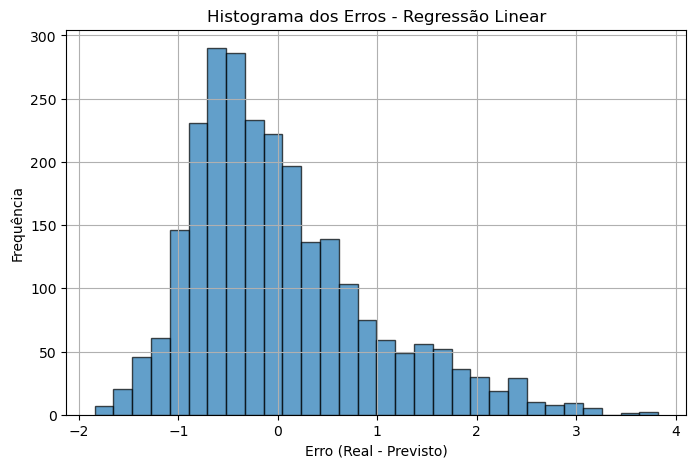

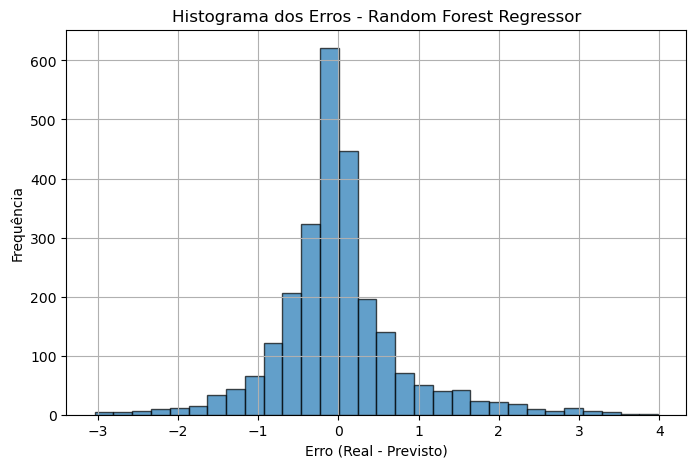

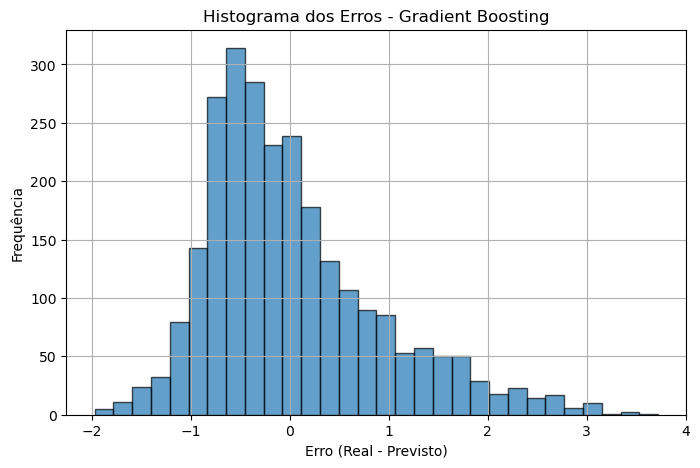

In [77]:
# Função para criar histogramas de erros
def histograma_erros(y_test, y_pred, model_name):
    erros = y_test - y_pred
    plt.figure(figsize=(8, 5))
    plt.hist(erros, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histograma dos Erros - {model_name}')
    plt.xlabel('Erro (Real - Previsto)')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# Gerando histogramas dos erros para cada modelo
histograma_erros(y_test, y_pred, "Regressão Linear")
histograma_erros(y_test, y_pred_rf, "Random Forest Regressor")
histograma_erros(y_test, y_pred_gb, "Gradient Boosting")


**Regressão Linear**: Apresenta uma maior dispersão dos erros, indicando baixa precisão do modelo.

**Random Forest Regressor**: Os erros são mais concentrados ao redor de zero, evidenciando melhor desempenho.

**Gradient Boosting**: Apresenta erros moderadamente concentrados, mas menos precisos que o Random Forest.

# Etapa 5 Crisp-DM: Avaliação dos resultados

O modelo de Random Forest mostrou desempenho superior aos outros modelos em todas as métricas.

# Etapa 6 Crisp-DM: Implantação

Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.